In [1]:
import ROOT
from plugins.CMS_lumi import CMS_lumi

Welcome to JupyROOT 6.24/06


In [2]:
ROOT.EnableImplicitMT()

fData = [
    "./miniTree/2016_preVFP/miniTree_Data_2016_preVFP.root",
    "./miniTree/2016_postVFP/miniTree_Data_2016_postVFP.root",
    "./miniTree/2017/miniTree_Data_2017.root",
    "./miniTree/2018/miniTree_Data_2018.root"
]

fZg = [
    "./miniTree/2016_preVFP/miniTree_ZGToLLG_2016_preVFP.root",
    "./miniTree/2016_postVFP/miniTree_ZGToLLG_2016_postVFP.root",
    "./miniTree/2017/miniTree_ZGToLLG_2017.root",
    "./miniTree/2018/miniTree_ZGToLLG_2018.root"
]


rdf_Zg = ROOT.RDataFrame("outTree", fZg)
# rdf_TT = ROOT.RDataFrame("outTree", "./miniTree/2017/miniTree_TTJets_2017.root")
rdf_Da = ROOT.RDataFrame("outTree", fData)

In [3]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

In [4]:
rdf_Zg1 = rdf_Zg.Filter("isHggPho_lep1 == 1 && convVtxRadius_lep1 < 40 && nGsfMatchToReco_lep1 > 1", "rconv")
# rdf_TT1 = rdf_TT.Filter("isHggPho_lep1 == 1 && convVtxRadius_lep1 < 16", "rconv")
rdf_Da1 = rdf_Da.Filter("isHggPho_lep1 == 1 && convVtxRadius_lep1 < 40 && nGsfMatchToReco_lep1 > 1", "rconv")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


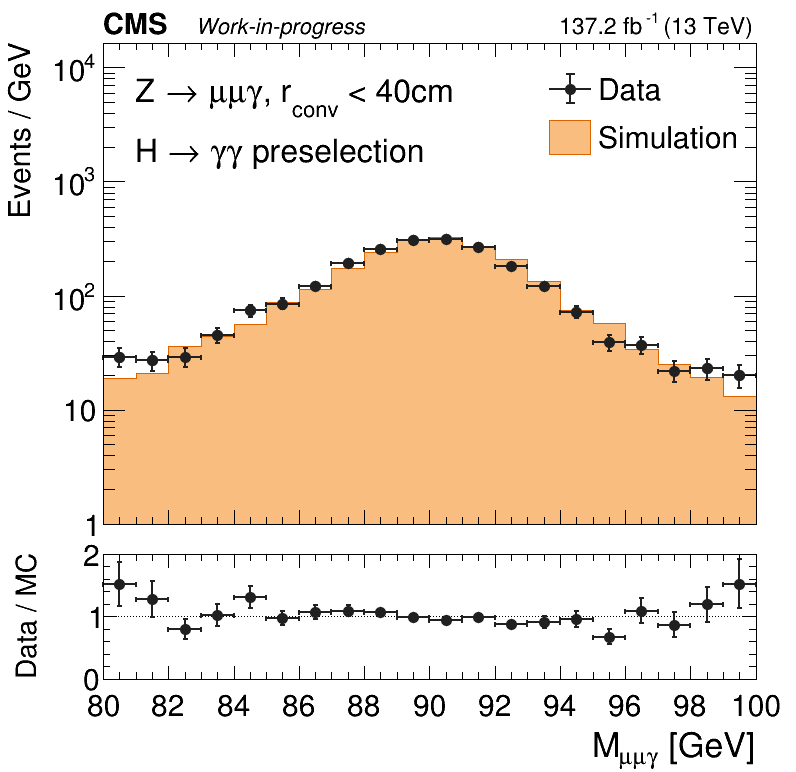

In [8]:
# data histogram
hMass_Da = rdf_Da1.Define("zMass", "Z.M()").Histo1D(("hDa", " ", 20, 80, 100), "zMass").GetPtr()

# simulation stack 
hs = ROOT.THStack("hs", " ")
# hMass_TT = rdf_TT1.Histo1D(("hTT", " ", 20, 80, 100), "zMass", "wei2").GetPtr()
# hMass_TT.SetFillColor(ROOT.TColor.GetColor("#1F4C7C"))
# hMass_TT.SetLineColor(ROOT.TColor.GetColor("#0D335D"))
# hs.Add(hMass_TT)
hMass_Zg = rdf_Zg1.Define("zMass", "Z.M()").Histo1D(("hZg", " ", 20, 80, 100), "zMass", "wei2").GetPtr()
hMass_Zg.SetFillColor(ROOT.TColor.GetColor("#F8BD7F"))
hMass_Zg.SetLineColor(ROOT.TColor.GetColor("#DB6401"))
hs.Add(hMass_Zg)

# ratio histogram
hMass_MC = hMass_Zg.Clone("hMC")
# hMass_MC.Add(hMass_TT)
hMass_Ra = hMass_Da.Clone()
hMass_Ra.Divide(hMass_MC)

# plotting 
c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

pad1 = ROOT.TPad("pad1", " ", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.05)
pad1.SetTopMargin(0.08)
pad1.SetRightMargin(0.05)
pad1.SetLeftMargin(0.13)
pad1.SetBottomMargin(0.03)
pad1.Draw()          
pad1.cd()
pad1.SetLogy()

hMass_Da.GetXaxis().SetTitle("")
hMass_Da.GetYaxis().SetTitle("Events / GeV")

hMass_Da.GetYaxis().SetRangeUser(1, hMass_MC.GetBinContent(hMass_MC.GetMaximumBin()) * 50)
hMass_Da.GetYaxis().SetTickSize(0.03)
hMass_Da.GetYaxis().SetTitleSize(0.06)
hMass_Da.GetYaxis().SetLabelSize(0.06)
hMass_Da.GetYaxis().SetTitleOffset(1.1)

hMass_Da.GetXaxis().SetTickSize(0.03)
hMass_Da.GetXaxis().SetTitleSize(0.06)
hMass_Da.GetXaxis().SetLabelSize(0.05)
hMass_Da.GetXaxis().SetLabelOffset(0.1)
hMass_Da.GetXaxis().SetTitleOffset(1)
hMass_Da.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
hMass_Da.SetMarkerSize(1.4)
hMass_Da.SetMarkerStyle(20)
hMass_Da.SetLineColor(ROOT.TColor.GetColor("#202020"))
hMass_Da.SetLineWidth(2)
hMass_Da.Draw("E1P")

hs.Draw("hist same")

hMass_Da.Draw("E1P SAME")

CMS_lumi(pad1, 5, 0, "137.2 fb^{-1}", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.065)
ltx.DrawLatex(0.17, 0.81, "Z #rightarrow #mu#mu#gamma, r_{conv} < 40cm")

ltx1 = ROOT.TLatex()
ltx1.SetNDC()
ltx1.SetTextFont(42)
ltx1.SetTextSize(0.065)
ltx1.DrawLatex(0.17, 0.7, "H #rightarrow #gamma#gamma preselection")

leg = ROOT.TLegend(0.68, 0.7, 0.97, 0.88)
leg.SetTextSize(0.06)
leg.AddEntry(hMass_Da, "Data", "lep")
leg.AddEntry(hMass_Zg, "Simulation", "f")
# leg.AddEntry(hMass_TT, "t#bar{t}", "f")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

pad1.RedrawAxis()

c1.cd()

pad2 = ROOT.TPad("pad2", "", 0, 0, 1, 0.3)
pad2.SetGridy()
pad2.SetRightMargin(0.05)
pad2.SetLeftMargin(0.13)
pad2.SetTopMargin(0.06)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

hMass_Ra.SetName("")
hMass_Ra.SetTitle("")
hMass_Ra.GetXaxis().SetTitle("M_{#mu#mu#gamma} [GeV]")
# hMass_Ra.GetXaxis()->SetRangeUser(xmin, xmax)
hMass_Ra.GetYaxis().SetTitle("Data / MC")
hMass_Ra.GetYaxis().SetRangeUser(0 , 2)

hMass_Ra.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
hMass_Ra.SetMarkerSize(1.4)
hMass_Ra.SetMarkerStyle(20)
hMass_Ra.SetLineColor(ROOT.TColor.GetColor("#202020"))
hMass_Ra.SetLineWidth(2)

hMass_Ra.GetXaxis().SetTickSize(0.03 * (7/3.))
hMass_Ra.GetXaxis().SetTitleSize(0.16)
hMass_Ra.GetXaxis().SetTitleOffset(1.2)
hMass_Ra.GetXaxis().SetLabelSize(0.06  * (7/3.))
hMass_Ra.GetXaxis().SetLabelOffset(0.05)
hMass_Ra.GetYaxis().SetTitleSize(0.13)
hMass_Ra.GetYaxis().SetTitleOffset(0.2 * (7/3.))
hMass_Ra.GetYaxis().SetLabelSize(0.06  * (7/3.))
hMass_Ra.GetYaxis().SetNdivisions(502)
hMass_Ra.Draw("E1P")

c1.Draw()

In [9]:
import os

outRes = "./plots/kinematics"
if not os.path.exists(outRes):
    os.makedirs(outRes)
    
c1.Print("{}/zMass_genwei.pdf".format(outRes))

Info in <TCanvas::Print>: pdf file ./plots/kinematics/zMass_genwei.pdf has been created


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ./plots/kinematics/phoCalibEt_lep1_genwei.pdf has been created


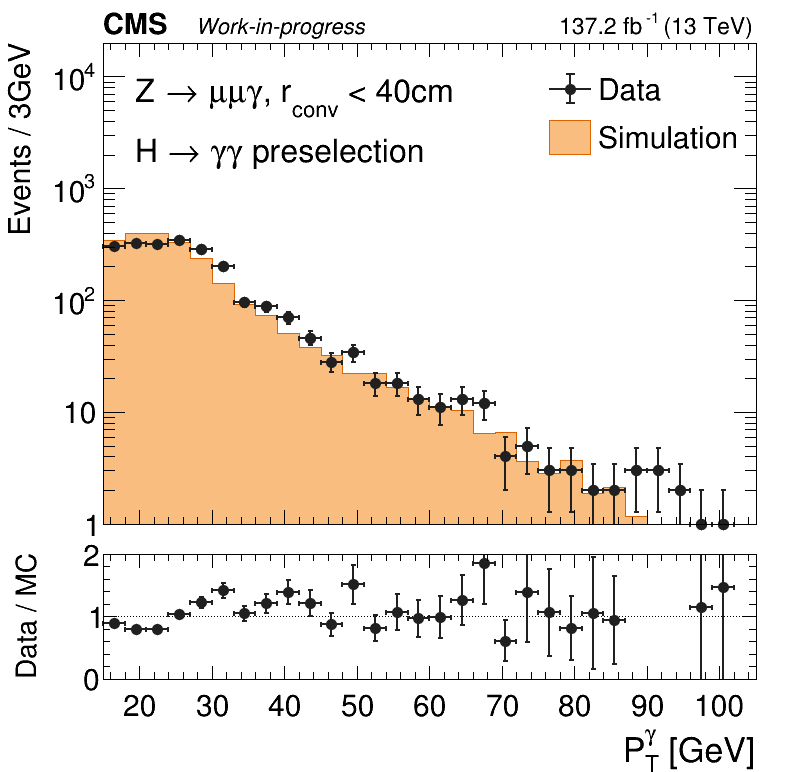

In [10]:
# data histogram
hMass_Da = rdf_Da1.Histo1D(("hDa", " ", 30, 15, 105), "phoCalibEt_lep1").GetPtr()

# simulation stack 
hs = ROOT.THStack("hs", " ")
# hMass_TT = rdf_TT1.Histo1D(("hTT", " ", 30, 15, 135), "phoCalibEt_lep1", "wei2").GetPtr()
# hMass_TT.SetFillColor(ROOT.TColor.GetColor("#1F4C7C"))
# hMass_TT.SetLineColor(ROOT.TColor.GetColor("#0D335D"))
# hs.Add(hMass_TT)
hMass_Zg = rdf_Zg1.Histo1D(("hZg", " ", 30, 15, 105), "phoCalibEt_lep1", "wei2").GetPtr()
hMass_Zg.SetFillColor(ROOT.TColor.GetColor("#F8BD7F"))
hMass_Zg.SetLineColor(ROOT.TColor.GetColor("#DB6401"))
hs.Add(hMass_Zg)

# ratio histogram
hMass_MC = hMass_Zg.Clone("hMC")
# hMass_MC.Add(hMass_TT)
hMass_Ra = hMass_Da.Clone()
hMass_Ra.Divide(hMass_MC)

# plotting 
c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

pad1 = ROOT.TPad("pad1", " ", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.05)
pad1.SetTopMargin(0.08)
pad1.SetRightMargin(0.05)
pad1.SetLeftMargin(0.13)
pad1.SetBottomMargin(0.03)
pad1.Draw()          
pad1.cd()
pad1.SetLogy()

hMass_Da.GetXaxis().SetTitle("")
hMass_Da.GetYaxis().SetTitle("Events / 3GeV")

hMass_Da.GetYaxis().SetRangeUser(1, hMass_MC.GetBinContent(hMass_MC.GetMaximumBin()) * 50)
hMass_Da.GetYaxis().SetTickSize(0.03)
hMass_Da.GetYaxis().SetTitleSize(0.06)
hMass_Da.GetYaxis().SetLabelSize(0.06)
hMass_Da.GetYaxis().SetTitleOffset(1.1)

hMass_Da.GetXaxis().SetTickSize(0.03)
hMass_Da.GetXaxis().SetTitleSize(0.06)
hMass_Da.GetXaxis().SetLabelSize(0.05)
hMass_Da.GetXaxis().SetLabelOffset(0.1)
hMass_Da.GetXaxis().SetTitleOffset(1)
hMass_Da.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
hMass_Da.SetMarkerSize(1.4)
hMass_Da.SetMarkerStyle(20)
hMass_Da.SetLineColor(ROOT.TColor.GetColor("#202020"))
hMass_Da.SetLineWidth(2)
hMass_Da.Draw("E1P")

hs.Draw("hist same")

hMass_Da.Draw("E1P SAME")

CMS_lumi(pad1, 5, 0, "137.2 fb^{-1}", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.065)
ltx.DrawLatex(0.17, 0.81, "Z #rightarrow #mu#mu#gamma, r_{conv} < 40cm")

ltx1 = ROOT.TLatex()
ltx1.SetNDC()
ltx1.SetTextFont(42)
ltx1.SetTextSize(0.065)
ltx1.DrawLatex(0.17, 0.7, "H #rightarrow #gamma#gamma preselection")

leg = ROOT.TLegend(0.68, 0.7, 0.97, 0.88)
leg.SetTextSize(0.06)
leg.AddEntry(hMass_Da, "Data", "lep")
leg.AddEntry(hMass_Zg, "Simulation", "f")
# leg.AddEntry(hMass_TT, "t#bar{t}", "f")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

pad1.RedrawAxis()

c1.cd()

pad2 = ROOT.TPad("pad2", "", 0, 0, 1, 0.3)
pad2.SetGridy()
pad2.SetRightMargin(0.05)
pad2.SetLeftMargin(0.13)
pad2.SetTopMargin(0.06)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

hMass_Ra.SetName("")
hMass_Ra.SetTitle("")
hMass_Ra.GetXaxis().SetTitle("P^{#gamma}_{T} [GeV]")
# hMass_Ra.GetXaxis()->SetRangeUser(xmin, xmax)
hMass_Ra.GetYaxis().SetTitle("Data / MC")
hMass_Ra.GetYaxis().SetRangeUser(0 , 2)

hMass_Ra.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
hMass_Ra.SetMarkerSize(1.4)
hMass_Ra.SetMarkerStyle(20)
hMass_Ra.SetLineColor(ROOT.TColor.GetColor("#202020"))
hMass_Ra.SetLineWidth(2)

hMass_Ra.GetXaxis().SetTickSize(0.03 * (7/3.))
hMass_Ra.GetXaxis().SetTitleSize(0.16)
hMass_Ra.GetXaxis().SetTitleOffset(1.2)
hMass_Ra.GetXaxis().SetLabelSize(0.06  * (7/3.))
hMass_Ra.GetXaxis().SetLabelOffset(0.05)
hMass_Ra.GetYaxis().SetTitleSize(0.13)
hMass_Ra.GetYaxis().SetTitleOffset(0.2 * (7/3.))
hMass_Ra.GetYaxis().SetLabelSize(0.06  * (7/3.))
hMass_Ra.GetYaxis().SetNdivisions(502)
hMass_Ra.Draw("E1P")

c1.Draw()
c1.Print("{}/phoCalibEt_lep1_genwei.pdf".format(outRes))